# Neural Network (nn)

[Edward Lu](https://github.com/edwardlu71/notebooks)

### Example: Linear Regression in 3 ways

#### Supervised Learning
the machine learning task of learning a function that maps an input to a desired output based on example input-output pairs.

1. Design model (input, output size, forward pass)
2. Construct loss and optimizer
3. Training loop
    - forward pass: compute prediction, i.e. only linear layer with activation 
    $$ y_{j} = \sum{w_{ij} * x_{i}}, L = \sigma(\sum{y_{j}}) $$
    - backward pass: gradients
    $$ \frac{\partial L}{\partial \vec{x}} = \frac{\partial L}{\partial \vec{y}} . \frac{\partial \vec{y}}{\partial \vec{x}} $$
    - update weight
    
Be aware everything is tensor

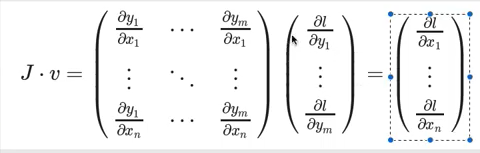


## Key Concepts

#### layer

- input layer
- linear layer
- activation (ReLu)
- full connection layer (linear)

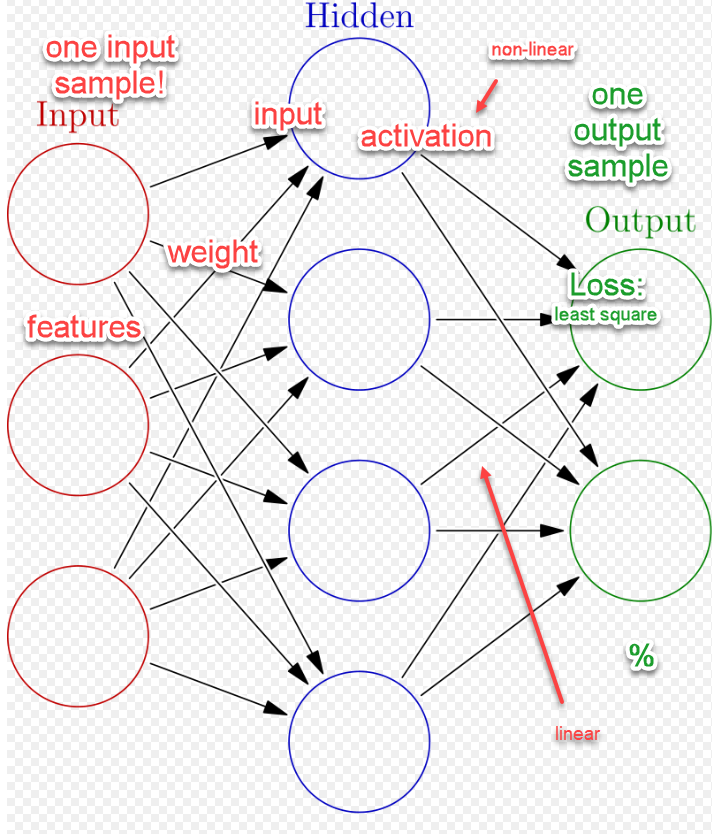

#### gradients

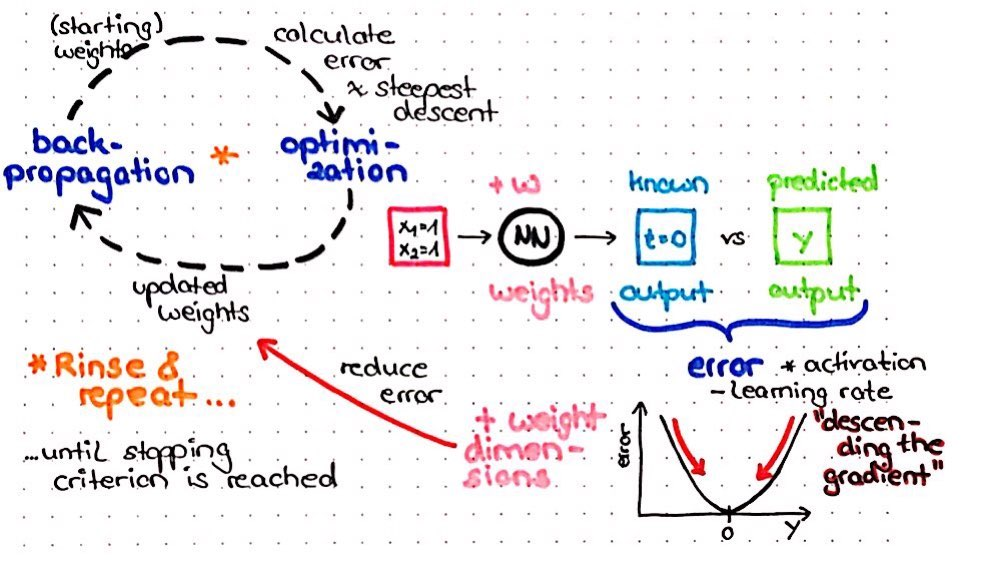

#### gradient descent

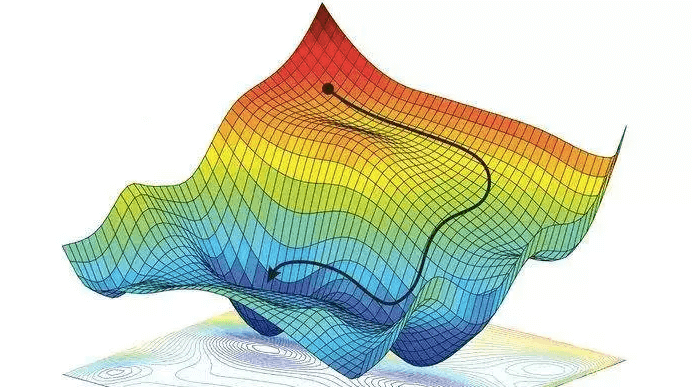

#### forward and backward propagation

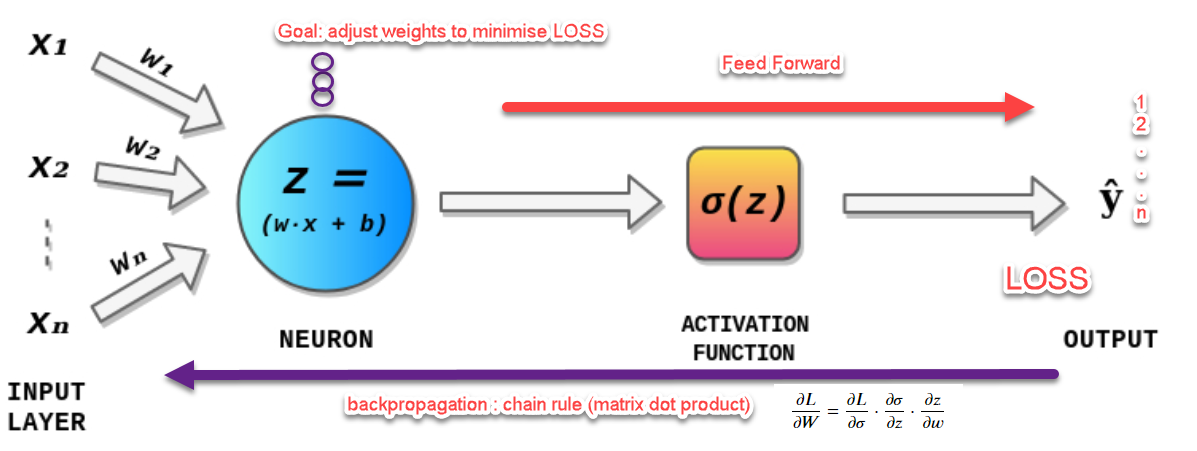


$$ \frac{\partial L}{\partial W} = \frac{\partial L}{\partial \sigma} \cdot \frac{\partial \sigma }{\partial z} \cdot \frac{\partial z}{\partial w} $$

#### Loss Functions

optimization by minimize the loss function (cost), or if it's negative maximise it (profit)

[Regression Loss Functions](https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0)

## Generation of sample data

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
# 0) prepare data
# Be aware of data shapes: X_numpy is vertical arrary of arries with one element; y_numpy is horizental array
X_numpy, y_numpy, coef = datasets.make_regression(n_samples=100, #number of samples
                                                  n_features=1, #number of features
                                                  n_informative=1, #number of useful features
                                                  noise=20, #bias and standard deviation of the guassian noise
                                                  coef=True, #true coefficient used to generated the data
                                                  random_state=1)

Text(0.5, 1.0, 'samples and traditional linear regression')

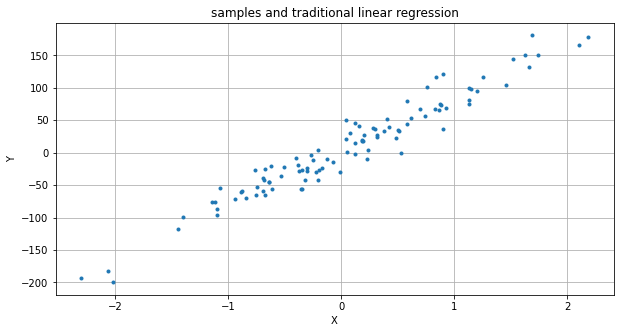

In [3]:
# convert X_numpy to horizental array
x_numpy = X_numpy.T[0]

# plot the data and linear regression result
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)

plt.ion() #interactive plot on
plt.grid(True)
plt.plot(X_numpy, y_numpy,'.',label='training data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('samples and traditional linear regression')

## 2. Use neural network to do linear regression

- with model
- only one hidden layer without activation (of course)

In [4]:
import torch
import torch.nn as nn

In [5]:
# convert to tensors
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

In [6]:
X, y

(tensor([[-0.6118],
         [-0.2494],
         [ 0.4885],
         [ 0.7620],
         [ 1.5198],
         [ 0.3776],
         [ 0.5129],
         [-0.6712],
         [-1.3965],
         [ 0.3156],
         [-0.6370],
         [-0.3968],
         [-1.1006],
         [ 0.9009],
         [-1.0999],
         [ 0.8280],
         [-0.0756],
         [-0.3522],
         [-0.6707],
         [-1.0730],
         [-0.3062],
         [ 2.1856],
         [ 0.8654],
         [ 0.1983],
         [-0.3841],
         [-0.6837],
         [ 0.0508],
         [ 0.5828],
         [ 1.2529],
         [-0.7544],
         [-0.3493],
         [-0.8876],
         [ 0.1866],
         [ 0.8762],
         [ 0.8390],
         [-0.5045],
         [-0.3439],
         [ 1.6925],
         [-2.3015],
         [ 0.9311],
         [ 2.1003],
         [ 1.4621],
         [-0.8452],
         [-0.8779],
         [-0.3224],
         [ 0.8851],
         [ 0.1600],
         [ 1.1316],
         [-0.3753],
         [ 0.5025],


In [7]:
# reshape y because y has only one row (1x100), we want each value in one row and the whole shape is one column (100x1)
y = y.view(y.shape[0], 1)
y

tensor([[-5.5539e+01],
        [-1.0662e+01],
        [ 2.2757e+01],
        [ 1.0110e+02],
        [ 1.4434e+02],
        [ 3.3289e+01],
        [ 3.3015e+01],
        [-2.5887e+01],
        [-9.9639e+01],
        [ 2.3803e+01],
        [-4.5589e+01],
        [-8.3388e+00],
        [-9.5315e+01],
        [ 3.6407e+01],
        [-8.7293e+01],
        [ 6.7669e+01],
        [-1.3687e+01],
        [-5.5441e+01],
        [-6.5340e+01],
        [-5.4450e+01],
        [-2.8835e+01],
        [ 1.7884e+02],
        [ 6.5084e+01],
        [ 2.6668e+01],
        [-1.8546e+01],
        [-4.1499e+01],
        [ 8.5583e-01],
        [ 4.4562e+01],
        [ 1.1598e+02],
        [-6.4620e+01],
        [-2.5931e+01],
        [-6.0882e+01],
        [ 1.8720e+01],
        [ 7.5070e+01],
        [ 1.1720e+02],
        [-2.2698e+01],
        [-5.6363e+01],
        [ 1.8084e+02],
        [-1.9257e+02],
        [ 6.8503e+01],
        [ 1.6552e+02],
        [ 1.0500e+02],
        [-7.0434e+01],
        [-5

In [8]:
# we prepared only one feature of data. The feature has 100 data samples
n_samples, n_features = X.shape
print(n_samples, n_features)

100 1


In [9]:
# 1) model
input_size = n_features
output_size = n_features
model = nn.Linear(input_size, output_size)
print(model)

Linear(in_features=1, out_features=1, bias=True)


In [10]:
# 2) loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss() # mean square error in this example
# SGD = stochastic gradient descent, instead of full data set it select some data calculation, saving cpu
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # for weights update

In [19]:
# 3) training loop
num_epochs = 200

In [20]:
# run training epoch, expect loss stable and convergent
for epoch in range(num_epochs):
    # prediction = forward pass and loss
    y_predicted = model(X)
    # loss
    loss = criterion(y_predicted, y)

    # gradient = backward pass
    loss.backward() #dLoss/dWeight

    # update weights
    optimizer.step()

    # zero gradients, clean up
    optimizer.zero_grad()

    if epoch % 100 == 0:
        print(f"epoch {epoch}: loss = {loss.item():.4f}")

epoch 0: loss = 1143.9050
epoch 100: loss = 367.2840


In [21]:
# harvest the prediction from the trained model. detach disable "required_grad", save memory
predicted = model(X).detach().numpy()

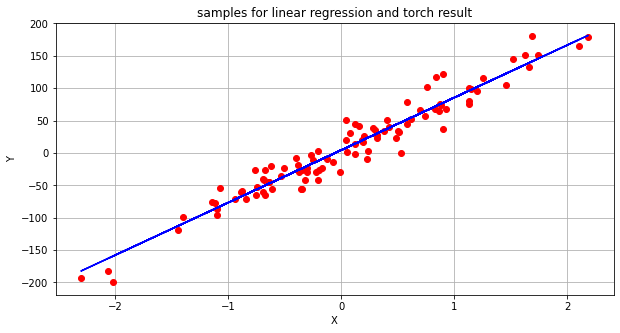

In [22]:
# plot the original data and training result
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)

plt.ion() #interactive plot on
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('samples for linear regression and torch result')
plt.plot(X_numpy, y_numpy, "ro")
plt.plot(X_numpy, predicted, "b")
#plt.plot(x_hat, y_hat, "g")
plt.show()